In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/telecom.csv'
df = pd.read_csv(path, skiprows=1, header=None)
print("Shape:", df.shape)
print(df.head(3))


Shape: (21508258, 9)
   0              1   2         3         4         5         6          7  \
0  1  1383260400000  39  0.141864  0.156787  0.160938  0.052275  11.028366   
1  1  1383261000000  39  0.278452  0.119926  0.188777  0.133637  11.100963   
2  1  1383261600000  39  0.330641  0.170952  0.134176  0.054601  10.892771   

                                     8  
0  sms-call-internet-mi-2013-11-01.txt  
1  sms-call-internet-mi-2013-11-01.txt  
2  sms-call-internet-mi-2013-11-01.txt  


Shape before cleaning: (21508258, 9)


/tmp/ipython-input-3220014726.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = hourly_df.set_index('datetime').asfreq('H')


After preprocessing: (480, 5)
                       sms_in   sms_out   call_in  call_out  internet
datetime                                                             
2013-10-31 23:00:00 -0.575690 -0.436174 -0.775648 -0.824459 -0.460011
2013-11-01 00:00:00 -0.763058 -0.663027 -0.869665 -0.911723 -0.296425
2013-11-01 01:00:00 -0.862068 -0.781258 -0.909891 -0.935096 -0.095780
2013-11-01 02:00:00 -0.821301 -0.681306 -0.913265 -0.873652  0.029387
2013-11-01 03:00:00 -0.925507 -0.655676 -0.925148 -0.884933  0.428804
aved telecom_processed.csv
Saved train_processed.csv (420 rows) and test_processed.csv (60 rows)


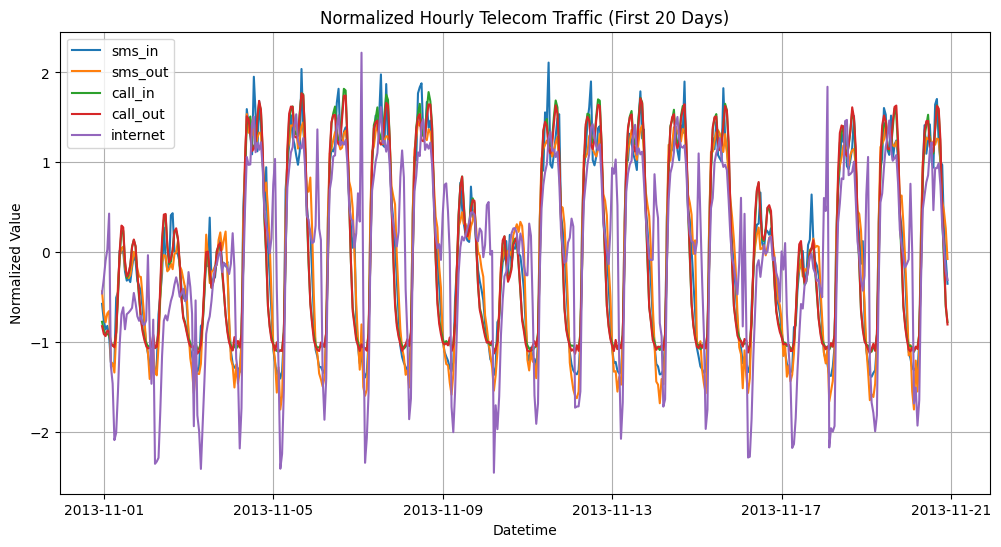

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === 1. Load Data ===
path = '/content/drive/MyDrive/telecom.csv'
df = pd.read_csv(path, skiprows=1, header=None)

# === 2. Assign Columns ===
df.columns = [
    'city', 'timestamp', 'time_interval',
    'sms_in', 'sms_out', 'call_in', 'call_out',
    'internet', 'source_file'
]

print("Shape before cleaning:", df.shape)

# === 3. Convert timestamp to datetime ===
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df.dropna(subset=['datetime'], inplace=True)

# === 4. Convert all numerical columns to float ===
cols = ['sms_in','sms_out','call_in','call_out','internet']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# === 5. Drop NaN rows & sort ===
df.dropna(subset=cols, inplace=True)
df = df.sort_values('datetime')

# === 6. Aggregate hourly across all cells ===
hourly_df = df.groupby('datetime')[cols].mean().reset_index()

# === 7. Fill missing hours (reindex to full hourly frequency) ===
hourly_df = hourly_df.set_index('datetime').asfreq('H')
hourly_df.interpolate(method='time', inplace=True)

# === 8. Normalize features ===
scaler = StandardScaler()
hourly_df[cols] = scaler.fit_transform(hourly_df[cols])

print("After preprocessing:", hourly_df.shape)
print(hourly_df.head())

# === 9. Save processed dataset ===
hourly_df.reset_index().to_csv('/content/drive/MyDrive/telecom_processed.csv', index=False)
print("Saved telecom_processed.csv")

# === 10. Train/test split (7:1 ratio) ===
total_hours = len(hourly_df)
train_cutoff = int(total_hours * 7 / 8)

train_df = hourly_df.iloc[:train_cutoff]
test_df  = hourly_df.iloc[train_cutoff:]

train_df.to_csv('/content/drive/MyDrive/train_processed.csv')
test_df.to_csv('/content/drive/MyDrive/test_processed.csv')

print(f"Saved train_processed.csv ({len(train_df)} rows) and test_processed.csv ({len(test_df)} rows)")

# === 11. Visualize ===
plt.figure(figsize=(12,6))
for c in cols:
    plt.plot(hourly_df.index, hourly_df[c], label=c)
plt.title("Normalized Hourly Telecom Traffic (First 20 Days)")
plt.xlabel("Datetime")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
os.path.exists('/content/drive/MyDrive/train_processed.csv')


True

In [ ]:
import os
os.path.exists('/content/drive/MyDrive/test_processed.csv')


True